# OD - Second Delivery

### Group 14 - 93294, 93661, 96409
#### Individual Contributions: Madalena Sampaio, 93294

## Artificial Bee Colony

In [104]:
import os 
import random
import numpy as np
import pandas as pd
import importlib as imp
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_columns = 150
from utils import tools, visualize, common

Choose and import the dataset

In [105]:
filename = "benchmarks.xlsx"
sheet_name = "101_nodes"        # Choose "54_nodes" or "101_nodes"
capacity = 112                 # 100 for "54_nodes", 112 for "101_nodes" 

df = pd.read_excel(filename, sheet_name=sheet_name)
df.head()

,Location,X,Y,Demand
0,1,35,35,0
1,2,41,49,10
2,3,35,17,7
3,4,55,45,13
4,5,55,20,19


Read the dataset and compute the cost matrix

In [106]:
def read_data():
    """
    Assumes the data is in columns labeled 'X', 'Y', and 'Demand'.
    """
    coordinates = df[['X', 'Y']].values
    demands = df['Demand'].values
    return coordinates, demands

def calculate_distance_matrix(coordinates):
    """
    Calculate the distance matrix between coordinates.
    """
    num_points = len(coordinates)
    dist_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            dist_matrix[i, j] = calculate_distance(coordinates, i, j)

    return dist_matrix


def calculate_distance(coordinates, i, j):
    """
    Calculate the Euclidean distance between two points.
    """
    x1, y1 = coordinates[i]
    x2, y2 = coordinates[j]
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

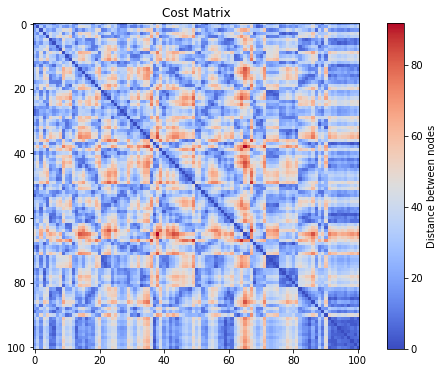

In [107]:
# Cost matrix
coordinates, demands = read_data()
distance_matrix = calculate_distance_matrix(coordinates)

# Plot cost matrix as a heatmap
plt.figure(figsize=(10,6))
plt.imshow(distance_matrix, cmap= 'coolwarm')
plt.colorbar(label='Distance between nodes')
plt.title('Cost Matrix')
plt.show()

Define the "problem" dictionary with the available data from the benchmark

In [108]:
problem = {
    'n_trucks': 14,                              # minimum number of trucks 
    'optimal': 1071,                             # Optimal Value
    'capacity': 112,                             # Trucks capacity
    'locations': list(zip(df['X'], df['Y'])),    # Pairs (X,Y) for each node
    'n_locations': len(df),                      # Total no of nodes, including depot
    'depot_i': 0,                                # Index corresponding to the depot node
    'demands': df['Demand'].tolist(),            # List of demands for each node
    'dists': distance_matrix                     # Cost matrix
}

n_trucks -> 14
optimal -> 1071
capacity -> 112
n_locations -> 101
depot_i -> 0
demands -> [0, 10, 7, 13, 19, 26, 3, 5, 9, 16, 16, 12, 19, 23, 20, 8, 19, 2, 12, 17, 9, 11, 18, 29, 3, 6, 17, 16, 16, 9, 21, 27, 23, 11, 14, 8, 5, 8, 16, 31, 9, 5, 5, 7, 18, 16, 1, 27, 36, 30, 13, 10, 9, 14, 18, 2, 6, 7, 18, 28, 3, 13, 19, 10, 9, 20, 25, 25, 36, 6, 5, 15, 25, 9, 8, 18, 13, 14, 3, 23, 6, 26, 16, 11, 7, 41, 35, 26, 9, 15, 3, 1, 2, 22, 27, 20, 11, 12, 10, 9, 17]


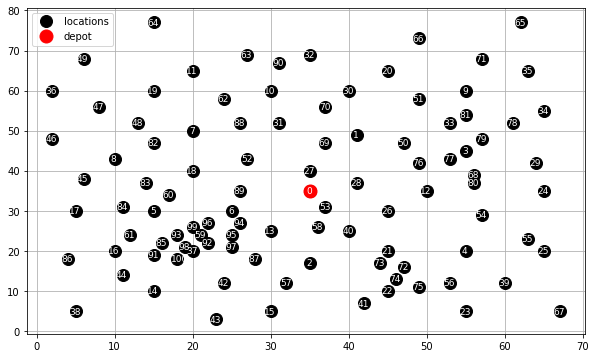

In [109]:
tools     = imp.reload(tools)
visualize = imp.reload(visualize)
common    = imp.reload(common)

visualize.visualize_problem(problem)
for k, v in problem.items():
    if k !='locations' and k !='dists':
        print(k,"->", v)


In [110]:
from utils import tools, visualize, common
common   = imp.reload(common)
#solution = [0, 43, 4, 28, 5, 50, 39, 7, 20, 23, 0, 
#            30, 52, 16, 6, 32, 13, 11, 38, 26, 35, 0, 
#            18, 49, 29, 15, 10, 36, 1, 17, 45, 0, 
#            34, 41, 46, 51, 42, 24, 2, 12, 27, 14, 0, 
#            25, 47, 37, 8, 19, 31, 33, 0, 
#            44, 53, 3, 22, 0, 
#            21, 9, 40, 48, 0]     #solution for 54_nodes using nearest neighbors
            
solution = [0, 53, 58, 40, 21, 73, 72, 74, 22, 0, 
            27, 28, 26, 12, 80, 68, 55, 0, 
            89, 6, 94, 95, 97, 92, 59, 91, 17, 46, 0, 
            13, 87, 2, 57, 15, 43, 42, 100, 37, 60, 0, 
            52, 18, 83, 84, 5, 96, 99, 93, 7, 0, 
            69, 1, 50, 76, 77, 3, 79, 33, 78, 24, 90, 0, 
            31, 88, 62, 10, 70, 30, 20, 36, 0, 
            98, 85, 61, 16, 44, 8, 0, 
            54, 4, 56, 75, 41, 23, 25, 29, 0, 
            82, 48, 47, 19, 11, 0, 
            51, 9, 81, 34, 35, 71, 65, 0, 
            45, 86, 38, 14, 67, 0, 
            39, 66, 32, 63, 64, 0, 49, 0]     #solution for 101_nodes using nearest neighbors

print('Is feasible? {}'.format(common.check_solution(problem, solution, verbose=True)))
#sol_cost = 1412.09   #solution cost for 54_nodes using nearest neighbors
sol_cost = 1609.95   #solution cost for 101_nodes using nearest neighbors

print('Solution cost:', sol_cost)

Is feasible? True
Solution cost: 1609.95


In [117]:
from algorithm import bee_colony, local_search, neighbor_operator
bee_colony = imp.reload(bee_colony)
local_search = imp.reload(local_search)
neighbor_operator = imp.reload(neighbor_operator)
common = imp.reload(common)


ABC = bee_colony.BeeColony(problem)
ABC.set_params(    
                   n_epoch=800,
                   n_initials=50,
                   n_onlookers=50,
                   search_limit=150
              )
%time abc_solution = ABC.solve(alpha=0.1, delta=0.01, gen_alpha=0.01, gen_betta=25)

  0%|          | 0/800 [00:00<?, ?it/s]

Tries:  21
CPU times: total: 16min 4s
Wall time: 17min 46s


In [118]:
new_cost = common.compute_solution(problem, abc_solution)
print('Is feasible?',common.check_solution(problem, abc_solution, verbose=True))
print('Is capacity?',common.check_capacity_criteria(problem, abc_solution, verbose=False))
print('ABC cost: {}'.format(new_cost))
print('Optimal cost: {}'.format(problem['optimal']))

Is feasible? True
Is capacity? True
ABC cost: 1191.3815444700988
Optimal cost: 1071


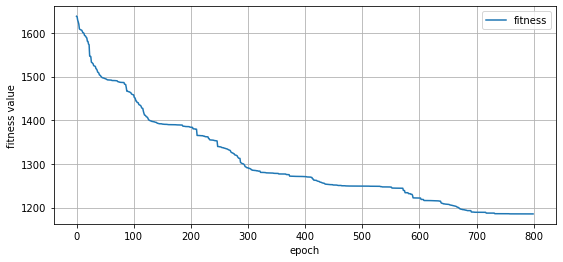

In [119]:
visualize = imp.reload(visualize)
visualize.visualize_fitness(ABC.history)

The alpha parameter is related to how strictly solutions that violate capacity constraints are penalized. Below, the history of the values of alpha over the iterations are presented.

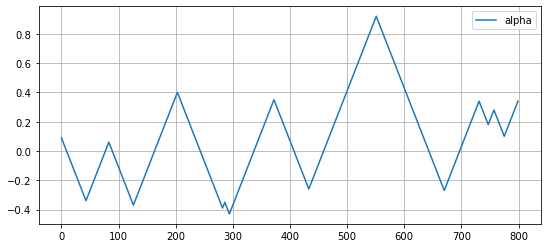

In [120]:
plt.figure(figsize=(9,4))
plt.plot(ABC.history_alpha, label='alpha')
plt.legend()
plt.grid()
plt.show()

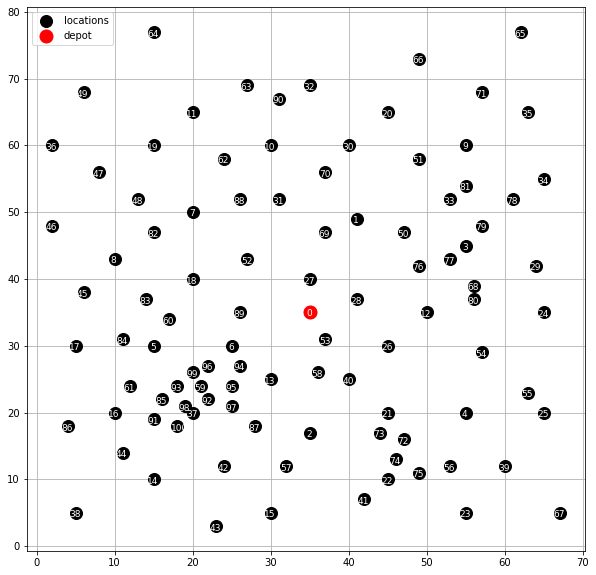

In [121]:
visualize.visualize_problem(problem, solution, figsize=(10,10))

Route #1 [53 58 40 73 21 26 28]
Route #2 [ 59  92  37 100  97  95  13]
Route #3 [87 57 15 43 14 42 94]
Route #4 [10 32 63 64 49 36 46 18]
Route #5 [69 20 66 65 71 35  9 51]
Route #6 [52 82 48 47 19  7]
Route #7 [44 38 86 16 17 99 96]
Route #8 [31 88 62 11 90 30 70 27]
Route #9 [ 5 84 45  8 83 60 89]
Route #10 [80 77  3 79 78 34 81 33]
Route #11 [74 75 23 67 39]
Route #12 [12 54 68 76 50  1]
Route #13 [29 24 55 25  4 56 72 22 41  2]
Route #14 [ 6 93 61 91 85 98]


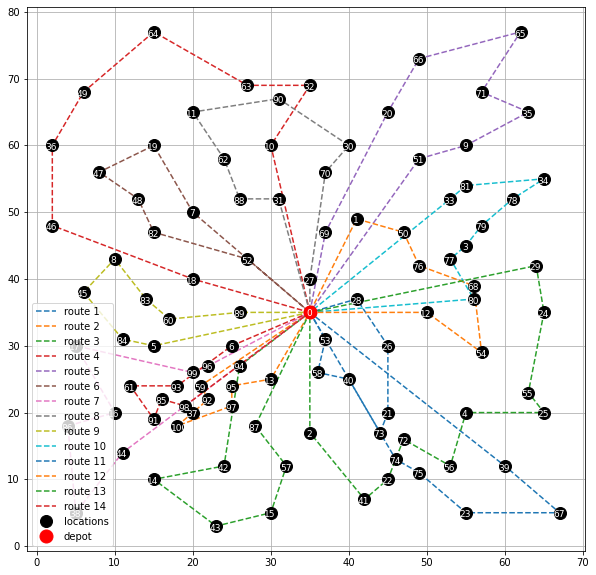

In [122]:
visualize.visualize_problem(problem, abc_solution, figsize=(10,10))
depots = list(filter(lambda i: abc_solution[i]==0, range(len(abc_solution))))
for i, route in  enumerate(common.get_routes(abc_solution)):
    print('Route #{}'.format(i+1),route)

In [130]:
def plot_routes(coordinates, solution):
    """
    Plot the nodes and routes on a 2D plot.
    """
    plt.figure(figsize=(10,10))
    
    # Plot the nodes
    plt.scatter(coordinates[:, 0], coordinates[:, 1], c='blue')
    
    # the depot's coordinates are the first entry in the coordinates array
    depot_x = coordinates[0, 0]
    depot_y = coordinates[0, 1]

    # Plot the routes
    for i, route in enumerate(common.get_routes(solution)):
        # Prepend and append the depot to each route
        full_route = [0] + list(route) + [0]
        
        x_coords = [coordinates[node, 0] for node in full_route]
        y_coords = [coordinates[node, 1] for node in full_route]
        
        plt.plot(x_coords, y_coords, marker='o', label=f'Route {i+1}')
    
    # highlight the depot with a distinct color and marker
    plt.plot(depot_x, depot_y, 'rs', markersize=10, label='Depot')  # 'rs' -> red square

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('VRP Routes')
    plt.legend()
    plt.grid(True)
    plt.show()


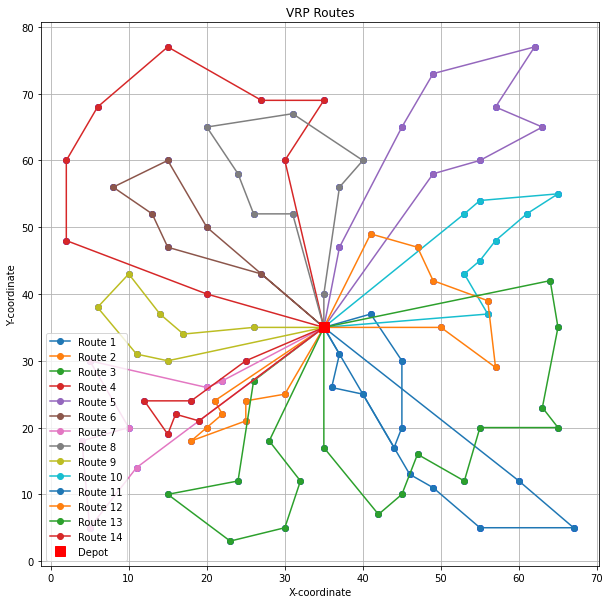

In [131]:
plot_routes(coordinates, abc_solution)